In [22]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation
from scipy.special import gamma, factorial
from scipy.optimize import fsolve

plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

%matplotlib inline

sns.set(style="darkgrid")

In [23]:
def f(x, q):
    return x**2 + (2*x**(2 - q) / gamma(3 - q))

# Метод KeiDiethelm

In [24]:
beta = -1
x0 = 0
N = 10
T = 1
q = 0.75
x = np.zeros(N + 1)
t = np.linspace(0, T, num = N + 1)
x[0] = x0;

In [25]:
def alpha(k, j, q):
    if (k == 0):
        return -1 / (q * (1 - q) * j**(-q))
    if (k > 0 and k < j): 
        return (2 * k**(1 - q) - (k - 1)**(1 - q) - (k + 1)**(1 - q)) / (q * (1 - q) * (j)**(-q))
    if (k == j):
        return ((q - 1) * k**(-q) - (k - 1)**(1 - q) + k**(1 - q)) / (q * (1 - q) * (j)**(-q))

In [26]:
gamm = gamma(-q)
for j in range(1, N + 1):
    sm = 0
    for k in range(1, j + 1):
        sm += alpha(k, j, q) * x[j - k]
    x[j] = 1 / (alpha(0, j, q) - (j / N)**(q) * gamm * beta) * ((j / N)**(q) * (gamm * f(t[j], q)) - sm - (1 / q) * x[0])
    
y_kei = x

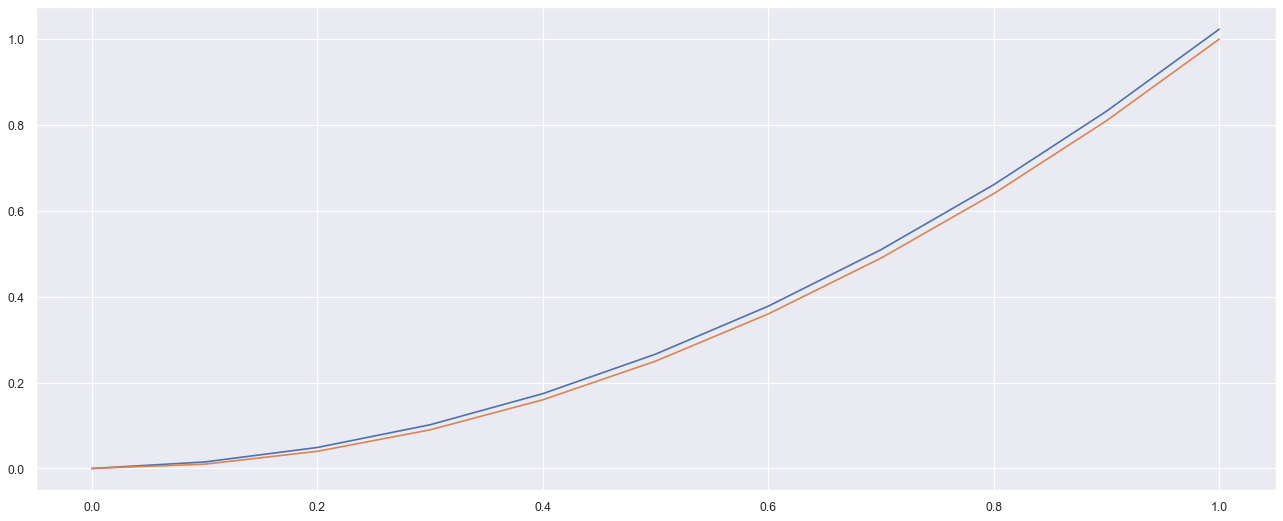

In [27]:
plt.figure(figsize = (20,8), dpi = 80)
plt.plot(t, x)
plt.plot(t, t**2)

# Метод Шхануков

In [28]:
def f_ch(x, y):
    return (2*x**(2 - a) / gamma(3 - a))

In [29]:
beta = -1
y0 = 0
N = 10
T = 1
tau = T / N
a = 0.75
y = np.zeros(N + 1)
x = np.linspace(0, T, num = N + 1)
y[0] = y0;

In [31]:
for i in range(0, N):
    sm = 0
    for s in range(0, i - 1):
        sm += (x[i - s + 1]**(1 - a) - x[i - s]**(1 - a)) * (y[s + 1] - y[s])
    y[i + 1] = 1 / (x[1]**(1 - a) - x[0]**(1 - a)) * (gamma(2 - a) * tau * f_ch(x[i], y[i], a) - sm) + y[i]

y_chan = y

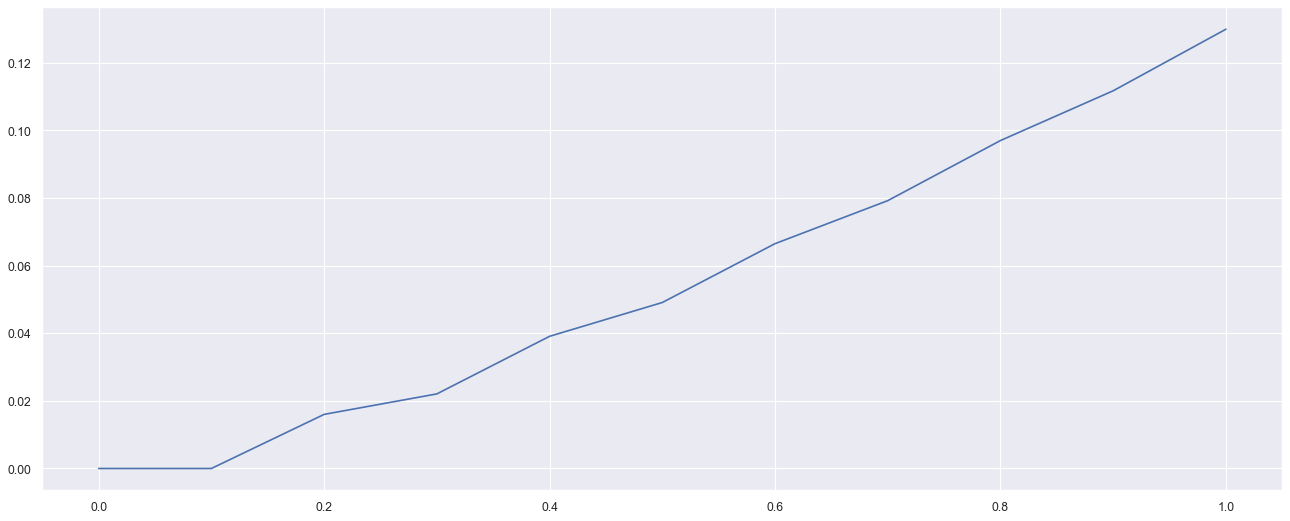

In [33]:
plt.figure(figsize = (20,8), dpi = 80)
plt.plot(x, y)
# plt.plot(t, t**2)

# Графики

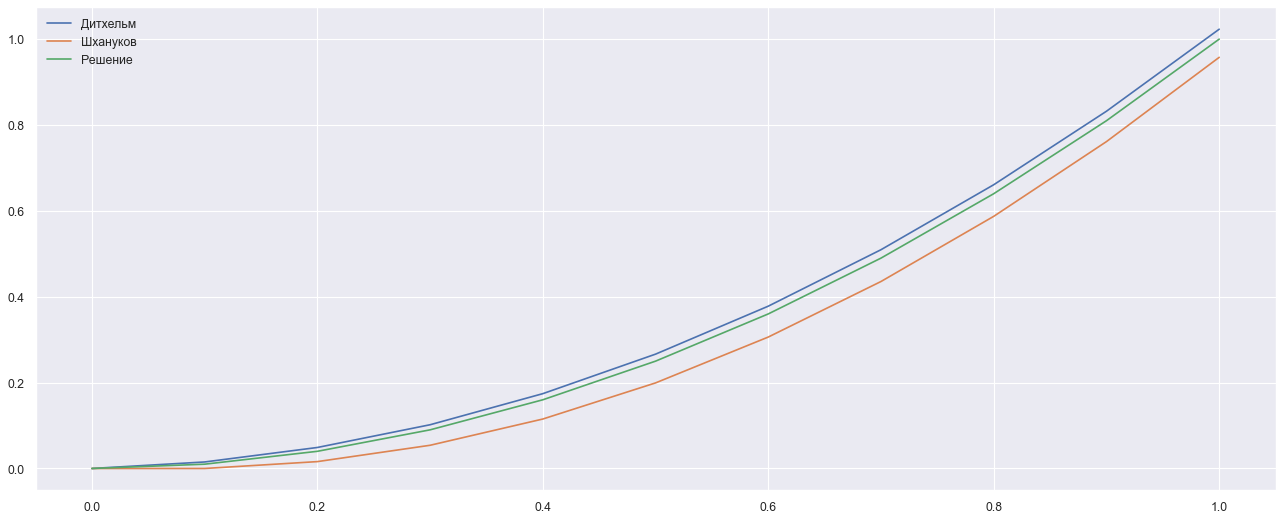

In [11]:
plt.figure(figsize = (20,8), dpi = 80)
plt.plot(x, y_kei, label="Дитхельм")
plt.plot(x, y_chan, label="Шхануков")
plt.plot(x, t**2, label="Решение")
plt.legend(loc='upper left', frameon=False)